# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import requests 
import json
import tweepy
import re

In [398]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [399]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode ='wb') as outfile:
    outfile.write(response.content)    

In [400]:
images = pd.read_csv('image-predictions.tsv', sep='\t', encoding='utf-8')
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

### I still didnt get Twitter approval for the API key, so i used the tweet-json.txt Udacity gives us. I dont need the Twiiter_api.py code then

In [401]:
df_list = []
with open('tweet-json.txt', 'r') as file:
    tweets= [json.loads(line) for line in file]
    for tweet in tweets:
        df_list.append({'tweet_id': tweet['id'],
                       'retweet_count': tweet['retweet_count'],
                       'favorite_count': tweet['favorite_count'],
                       'followers_count': tweet['user']['followers_count']})
            
        


In [402]:
tweet_json= pd.DataFrame(df_list, columns = ['tweet_id',
                                            'retweet_count',
                                            'favorite_count',
                                            'followers_count'])


In [403]:
tweet_json.to_csv('tweet-json.txt', encoding= 'utf-8', index=False)

In [404]:
tweet_json = pd.read_csv('tweet-json.txt', encoding='utf-8')
tweet_json

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [405]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [407]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [408]:
df.duplicated().sum()

0

In [409]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [410]:
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None
334,832682457690300417,NaN,NaN,2017-02-17 20:05:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Prosperous good boy 13/10 socioeconomic af htt...,NaN,NaN,NaN,https://twitter.com/telegraph/status/832268302...,13,10,None,None,None,None,None
138,865718153858494464,NaN,NaN,2017-05-19 23:57:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Boomer. He's just checking pup on you. Ho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865718153...,13,10,Boomer,None,None,None,None
1883,674805413498527744,NaN,NaN,2015-12-10 04:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your entire life is crumbling before you ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674805413...,10,10,None,None,None,None,None
1055,742385895052087300,NaN,NaN,2016-06-13 15:59:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. That's his comfort stick. He hol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742385895...,11,10,Phil,None,None,None,None
1336,705223444686888960,NaN,NaN,2016-03-03 02:49:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bode. He's a heavy sleeper. 9/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705223444...,9,10,Bode,None,None,None,None
2236,668154635664932864,NaN,NaN,2015-11-21 19:50:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Fun dogs here. Top one clearly an athlete. Bot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668154635...,9,10,None,None,None,None,None
378,827933404142436356,NaN,NaN,2017-02-04 17:34:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kona. Yesterday she stopped by the dep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827933404...,12,10,Kona,None,None,pupper,None
1447,696488710901260288,NaN,NaN,2016-02-08 00:20:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 revolutionary af https://t.co/zKzq4nIY86,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696488710...,12,10,None,None,None,None,None
1763,678446151570427904,NaN,NaN,2015-12-20 05:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Touching scene here. Really stirs up the emoti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678446151...,10,10,None,None,None,None,None


In [411]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [412]:
df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Daisy           7
Buddy           7
Bailey          7
Toby            7
an              7
Dave            6
Scout           6
Bella           6
Stanley         6
Jack            6
Oscar           6
Jax             6
Leo             6
Milo            6
Koda            6
Rusty           6
Sunny           5
             ... 
Ronduh          1
Scott           1
Iggy            1
Grizz           1
Pinot           1
Rueben          1
Asher           1
Sweet           1
Kingsley        1
Chuq            1
Bert            1
DonDon          1
Wiggles         1
Gilbert         1
Spanky          1
Longfellow      1
Hero            1
Lolo            1
Blipson         1
Jay             1
Horace          1
Ito             1
Rumpole         1
Fillup          1
Ralphus   

In [413]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [414]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [415]:
df['tweet_id'].duplicated().sum()

0

In [416]:
df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [417]:
df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [418]:
df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [419]:
df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [420]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [421]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [422]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [423]:
images.duplicated().sum()

0

In [424]:
images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [425]:
images['jpg_url'].value_counts()

https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                                            2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg                                            2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                                            2
https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                       

In [426]:
images['tweet_id'].duplicated().sum()

0

In [427]:
images.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1367,761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1,paddle,0.393118,False,canoe,0.178088,False,lakeside,0.099713,False
1910,853299958564483072,https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg,1,grille,0.652280,False,beach_wagon,0.112846,False,convertible,0.086252,False
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
733,686749460672679938,https://pbs.twimg.com/media/CYfS75fWAAAllde.jpg,1,cheeseburger,0.643808,False,hotdog,0.201378,False,bagel,0.063880,False
164,668975677807423489,https://pbs.twimg.com/media/CUit1O1WoAEBHjj.jpg,1,basset,0.605437,True,Welsh_springer_spaniel,0.184783,True,Saint_Bernard,0.116299,True
712,685321586178670592,https://pbs.twimg.com/media/CYLAWFMWMAEcRzb.jpg,1,Boston_bull,0.972483,True,French_bulldog,0.025469,True,boxer,0.000458,True
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True
155,668815180734689280,https://pbs.twimg.com/media/CUgb21RXIAAlff7.jpg,1,redbone,0.461172,True,Italian_greyhound,0.270733,True,miniature_pinscher,0.109752,True
543,677269281705472000,https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg,1,Shetland_sheepdog,0.656616,True,collie,0.195405,True,German_shepherd,0.013103,True
1329,757596066325864448,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1,doormat,0.845256,False,wallet,0.095718,False,wool,0.026072,False


In [428]:
images[images['jpg_url']== 'https://pbs.twimg.com/media/C0jBJZVWQAA2_-X.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1672,813112105746448384,https://pbs.twimg.com/media/C0jBJZVWQAA2_-X.jpg,1,dingo,0.287369,False,Pembroke,0.140682,True,basenji,0.090819,True


In [429]:
images[images['jpg_url']== 'https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2040,885167619883638784,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,4,malamute,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.05577,True


In [430]:
images['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [431]:
images['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
chow                               20
toy_terrier                        20
malinois                           20
miniature_pinscher                 20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [432]:
images['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [433]:
tweet_json

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


In [434]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [435]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count,followers_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


In [436]:
tweet_json.duplicated().sum()

0

In [437]:
tweet_json['tweet_id'].duplicated().sum()

0

In [438]:
tweet_json['retweet_count'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [439]:
tweet_json['favorite_count'].value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [440]:
tweet_json['followers_count'].value_counts()

3200891    232
3200950    198
3200943    193
3200947    127
3200901    118
3200892     86
3200952     76
3200894     69
3200953     65
3200951     64
3201004     60
3200945     59
3200944     53
3200890     52
3200895     51
3201018     50
3201002     49
3201003     48
3201006     43
3201008     41
3200900     35
3200898     35
3201014     35
3200908     35
3201016     34
3200897     29
3201015     26
3200906     26
3201011     25
3201017     25
          ... 
3200889     20
3200896     19
3201010     17
3201007     16
3200904     16
3200907     13
3201001     12
3200949     12
3200948     10
3200899      5
3200903      5
3200858      4
3200942      4
3200859      4
3200860      4
3201000      3
3200946      2
3200893      2
3200851      2
3200816      1
3200810      1
3200862      1
3200802      1
3200799      1
3201013      1
3200913      1
3200910      1
3200918      1
3200809      1
3200800      1
Name: followers_count, Length: 66, dtype: int64

### Quality issues
1. Different number of records in each dataset.

2. In some columns, Null objects are non null(it must be NaN instead of None).

3. Incorrect dog names.

4. We only want original ratings(no retweets) that have images

5. The ratings are not extracted correctly, especially decimals.

6. In df, timestamp  shoulb be in datetime , not object.

7. in images, some tweet_ids have the same jpg_url.

8. In images, p1,p2,p3 columns are inconsistent  with small and capitalize letters.

### Tidiness issues
1. Several class of dogs as columns instead of rows in df.
2. All tables should be part of one dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [441]:
# Make copies of original pieces of data
df_cleaned= df.copy()
images_cleaned= images.copy()
tweet_json_cleaned= tweet_json.copy()


### timestamp is string instead of datetime

#### Define: I'm going to change the timestamp data type to datetime in df_cleaned

#### Code

In [442]:
df_cleaned.timestamp = pd.to_datetime(df_cleaned.timestamp)

#### Test

In [443]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Drop unnecessary colums

#### Define: i will drop all columns about replies  and also reply since they aint relevant, and also expands=urls and img_num

#### Code

In [444]:
df_cleaned = df_cleaned.drop(['in_reply_to_status_id',
                              'in_reply_to_user_id',
                              'expanded_urls' ], axis=1)
images_cleaned= images_cleaned.drop(['img_num'], axis =1)

#### Test

In [445]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 257.8+ KB


In [446]:
images_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


### doggo,pupper,floofer and puppo colums in one column i will call dog_class

#### Define: I will put all the four columns in one and call it dog_class then drop others

#### Code

In [447]:
df_cleaned['dog_class'] = df_cleaned[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
df_cleaned['dog_class'] = df_cleaned['dog_class'].str.replace(r'(None,)', repl='')
df_cleaned.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

In [448]:
df_cleaned['dog_class'].value_counts()

None             1976
pupper,None       245
doggo              83
puppo,None         29
pupper,doggo       12
floofer,None        9
puppo,doggo         1
floofer,doggo       1
Name: dog_class, dtype: int64

In [449]:
df_cleaned['dog_class'] = df_cleaned['dog_class'].str.replace(r'pupper,None', repl='pupper')
df_cleaned['dog_class'] = df_cleaned['dog_class'].str.replace(r'puppo,None', repl='puppo')
df_cleaned['dog_class'] = df_cleaned['dog_class'].str.replace(r'floofer,None', repl='floofer')

In [450]:
df_cleaned['dog_class'].value_counts()

None             1976
pupper            245
doggo              83
puppo              29
pupper,doggo       12
floofer             9
puppo,doggo         1
floofer,doggo       1
Name: dog_class, dtype: int64

#### Test

In [451]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_class                     2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 202.5+ KB


In [452]:
df_cleaned['dog_class'].value_counts()

None             1976
pupper            245
doggo              83
puppo              29
pupper,doggo       12
floofer             9
puppo,doggo         1
floofer,doggo       1
Name: dog_class, dtype: int64

### In images_cleaned, put p1,p2,p3 in one column name dog_prediction and put p1_conf, p2_conf and p3_conf in a column name confidence_level

#### Define: i will create two lists: one dog_prediction and confidence_level. Then i will use def and search for true predictions and append them into a list with the level of confidence, NaN if the prediction is false. Then i will drop all others 9 columns about dogs predictions and confidence level of predictions and only keep teh tweet_id, jpg_url, dog_prediction, and confidence_level 

#### Code

In [453]:
dog_prediction=[]
confidence_level=[]

def dog_prediction_confidence(dataframe):
    if dataframe['p1_dog']==True:
        dog_prediction.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog']==True:
        dog_prediction.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog']==True:
        dog_prediction.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        dog_prediction.append('NaN')
        confidence_level.append(0)


In [454]:
images_cleaned.apply(dog_prediction_confidence, axis=1)
images_cleaned['dog_prediction'] = dog_prediction
images_cleaned['confidence_level']= confidence_level

In [455]:
images_cleaned.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_prediction,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [456]:
images_cleaned=images_cleaned.drop(['p1','p1_dog','p1_conf','p2','p2_dog','p2_conf','p3','p3_dog','p3_conf'], axis=1)

#### Test

In [457]:
images_cleaned.head()

,tweet_id,jpg_url,dog_prediction,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Put Correct Names

#### Define: i will extract correct names from text( After watching in the text column, i saw that they literally have all dogs names) column and create a new colum dog_name in df_cleaned and then drop the old one

#### Code

In [458]:
df_cleaned['text'].T

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

In [459]:
dog_name=[]

for text in df_cleaned['text']:
    if text.startswith('This is') and re.match(r'[A-Z].*', text.split()[2]):
        dog_name.append(text.split()[2].strip(',').strip('.'))
    elif text.startswith('Meet') and re.match(r'[A-Z].*', text.split()[1]):
        dog_name.append(text.split()[1].strip(',').strip('.'))
    elif text.startswith('Here we have') and re.match(r'[A-Z].*', text.split()[3]): 
        dog_name.append(text.split()[3].strip(',').strip('.'))
    elif text.startswith('Say hello to') and re.match(r'[A-Z].*', text.split()[3]):
        dog_name.append(text.split()[3].strip(',').strip('.'))
    elif 'named' in text and re.match('r[A-Z].*', text.split()[text.split().index('named')+1]):
        dog_name.append(text.split()[text.split().index('named')+1].strip(',').strip('.'))
    else:
        dog_name.append('None')


In [460]:
df_cleaned['dog_name']= dog_name
df_cleaned= df_cleaned.drop(['name'], axis=1)

#### Test

In [461]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
dog_class                     2356 non-null object
dog_name                      2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 202.5+ KB


In [462]:
df_cleaned['dog_name'].value_counts()

None         969
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Lola           8
Sadie          8
Winston        8
Daisy          7
Stanley        6
Koda           6
Toby           6
Bella          6
Jax            6
Bailey         6
Bo             6
Oscar          6
Louis          5
Chester        5
Buddy          5
Scout          5
Leo            5
Milo           5
Bentley        5
Rusty          5
Winnie         4
Sammy          4
Duke           4
            ... 
Tobi           1
Nida           1
Winifred       1
Mabel          1
Naphaniel      1
Tyrus          1
Clybe          1
Josep          1
Ed             1
Anakin         1
Dallas         1
Kendall        1
Crumpet        1
Millie         1
Ole            1
Kollin         1
Snicku         1
Sonny          1
Monster        1
Molly          1
Dawn           1
Sailor         1
Ricky          1
Gustaf         1
Bloo           1
Kawhi          1
Traviss        1
Major         

### Change None to NaN

#### Define: i will change all columns there's values None to NaN in dog_name column

#### Code

In [463]:
 def to_NaN(item):
        if item =='None':
            item=np.NaN
        return item    

In [464]:
df_cleaned['dog_name'] = [to_NaN(item) for item in df_cleaned['dog_name']]
df_cleaned['dog_class'] = [to_NaN(item) for item in df_cleaned['dog_class']]

#### Test

In [465]:
df_cleaned['dog_name'].value_counts()

Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Sadie        8
Lola         8
Winston      8
Daisy        7
Bo           6
Bailey       6
Bella        6
Stanley      6
Oscar        6
Jax          6
Koda         6
Toby         6
Scout        5
Rusty        5
Buddy        5
Bentley      5
Chester      5
Leo          5
Milo         5
Louis        5
Cassie       4
Scooter      4
Alfie        4
Brody        4
            ..
Kanu         1
Anna         1
Lacy         1
Oddie        1
Mya          1
Diogi        1
Swagger      1
Pinot        1
Grizz        1
Iggy         1
Ozzie        1
Rhino        1
Jackie       1
Carter       1
Hector       1
Rorie        1
Karl         1
Moofasa      1
Pubert       1
Divine       1
Godi         1
Carbon       1
Kyro         1
Quinn        1
Hercules     1
Stephan      1
Ben          1
Ronduh       1
Scott        1
Evy          1
Name: dog_name, Length: 932, dtype: int64

In [466]:
df_cleaned['dog_class'].value_counts()

pupper           245
doggo             83
puppo             29
pupper,doggo      12
floofer            9
puppo,doggo        1
floofer,doggo      1
Name: dog_class, dtype: int64

### Merge the 3 datasets into one dataset

#### Define: I will merge the three datasets into one dataset : master_clean (df_cleaned and images_cleaned) then merge it with the tweet_json_cleaned. then i will save it

#### Code

In [467]:
master_clean= pd.merge(df_cleaned,images_cleaned , how='left', on=['tweet_id'])
master_clean= pd.merge(master_clean,tweet_json_cleaned , how='left', on=['tweet_id'])

In [468]:
master_clean.to_csv('master_clean.csv', encoding='utf-8')

#### Test

In [469]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
dog_class                     380 non-null object
dog_name                      1387 non-null object
jpg_url                       2075 non-null object
dog_prediction                2075 non-null object
confidence_level              2075 non-null float64
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
followers_count               2354 non-null float64
dtypes: datetime64[

### Deleting retweets, duplicated tweet_id

#### Define: To make my merged dataset more clean, i will delete retweets using pandas and also duplicated tweet_id using drop_duplicates

#### Code

In [470]:
master_clean = master_clean[pd.isnull(master_clean.retweeted_status_id)]
master_clean = master_clean.drop_duplicates()

#### Test

In [471]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
dog_class                     344 non-null object
dog_name                      1387 non-null object
jpg_url                       1994 non-null object
dog_prediction                1994 non-null object
confidence_level              1994 non-null float64
retweet_count                 2175 non-null float64
favorite_count                2175 non-null float64
followers_count               2175 non-null float64
dtypes: datetime64[ns](1)

In [472]:
master_clean.duplicated().sum()

0

### Drop columns about retweeted and also delete tweets without pics

#### Define: i will drop all three coulmns about retweeted and with drop() and then i will drop tweets without pics with dropna()

#### Code

In [473]:
master_clean= master_clean.drop(['retweeted_status_user_id','retweeted_status_timestamp','retweeted_status_id'], axis=1)

In [474]:
master_clean= master_clean.dropna ( subset = ['jpg_url'])

#### Test

In [475]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
dog_class             306 non-null object
dog_name              1346 non-null object
jpg_url               1994 non-null object
dog_prediction        1994 non-null object
confidence_level      1994 non-null float64
retweet_count         1994 non-null float64
favorite_count        1994 non-null float64
followers_count       1994 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 233.7+ KB


### Put them in correct datatypes

#### Define: i will put each column in the correct datatypes with astype() function

#### Code

In [476]:
master_clean['tweet_id'] = master_clean['tweet_id'].astype(object)
master_clean['source'] = master_clean['source'].astype('category')
master_clean['dog_class'] = master_clean['dog_class'].astype('category')
master_clean['retweet_count'] = master_clean['retweet_count'].astype(int)
master_clean['favorite_count'] = master_clean['favorite_count'].astype(int)
master_clean['followers_count'] = master_clean['followers_count'].astype(int)

#### Test

In [477]:
master_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
rating_numerator               int64
rating_denominator             int64
dog_class                   category
dog_name                      object
jpg_url                       object
dog_prediction                object
confidence_level             float64
retweet_count                  int64
favorite_count                 int64
followers_count                int64
dtype: object

### Capitalize all first letters in name and dog_prediction columns

#### Define: Use capitalize() function to capitalize all first letters  dog_prediction columns

#### Code

In [478]:
master_clean['dog_prediction']= [item.capitalize() for item in master_clean['dog_prediction']]

#### Test

In [479]:
master_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_class,dog_name,jpg_url,dog_prediction,confidence_level,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Nan,0.000000,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,NaN,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,NaN,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,NaN,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,9774,41048,3200889


In [480]:
master_clean['dog_prediction'].value_counts()

Nan                               308
Golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
Pug                                62
Toy_poodle                         51
Chow                               48
Pomeranian                         42
Samoyed                            42
Malamute                           33
French_bulldog                     31
Chesapeake_bay_retriever           31
Cocker_spaniel                     30
Miniature_pinscher                 25
Eskimo_dog                         22
German_shepherd                    21
Staffordshire_bullterrier          21
Cardigan                           21
Shih-tzu                           20
Beagle                             20
Siberian_husky                     20
Rottweiler                         19
Maltese_dog                        19
Shetland_sheepdog                  19
Lakeland_terrier                   18
Kuvasz      

### Change Nan to NaN in do_prediction column

#### Define: I will change Nan To NaN in do_prediction column using a function too_NaN

#### Code

In [481]:
def too_NaN(item):
        if item =='Nan':
            item=np.NaN
        return item 

In [482]:
master_clean['dog_prediction'] = [too_NaN(item) for item in master_clean['dog_prediction']]

#### Test

In [483]:
master_clean['dog_prediction'].value_counts()

Golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
Pug                                62
Toy_poodle                         51
Chow                               48
Samoyed                            42
Pomeranian                         42
Malamute                           33
French_bulldog                     31
Chesapeake_bay_retriever           31
Cocker_spaniel                     30
Miniature_pinscher                 25
Eskimo_dog                         22
German_shepherd                    21
Staffordshire_bullterrier          21
Cardigan                           21
Shih-tzu                           20
Siberian_husky                     20
Beagle                             20
Rottweiler                         19
Shetland_sheepdog                  19
Maltese_dog                        19
Kuvasz                             18
Lakeland_terrier                   18
Basset      

In [484]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null category
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
dog_class             306 non-null category
dog_name              1346 non-null object
jpg_url               1994 non-null object
dog_prediction        1686 non-null object
confidence_level      1994 non-null float64
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
followers_count       1994 non-null int64
dtypes: category(2), datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 206.9+ KB


### Create a ratings column

#### Define: I will create a column about ratingd , so i will do rating_numerator/ rating_denominator

#### Code

In [485]:
master_clean['ratings']= master_clean.rating_numerator/master_clean.rating_denominator

#### Test

In [486]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null category
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
dog_class             306 non-null category
dog_name              1346 non-null object
jpg_url               1994 non-null object
dog_prediction        1686 non-null object
confidence_level      1994 non-null float64
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
followers_count       1994 non-null int64
ratings               1994 non-null float64
dtypes: category(2), datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 222.5+ KB


In [487]:
master_clean['ratings'].value_counts()

1.200000      454
1.000000      421
1.100000      402
1.300000      261
0.900000      151
0.800000       95
0.700000       51
1.400000       35
0.500000       34
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
177.600000      1
2.600000        1
3.428571        1
0.636364        1
0.818182        1
42.000000       1
7.500000        1
2.700000        1
Name: ratings, dtype: int64

In [488]:
master_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_class,dog_name,jpg_url,dog_prediction,confidence_level,retweet_count,favorite_count,followers_count,ratings
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000,8853,39467,3200889,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,NaN,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819,3200889,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461,3200889,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,NaN,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908,3200889,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,NaN,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,9774,41048,3200889,1.2
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595,3261,20562,3200889,1.3
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,NaN,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,2158,12041,3200889,1.3
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,16716,56848,3200889,1.3
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,NaN,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,4429,28226,3200889,1.3
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,doggo,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,7711,32467,3200889,1.4


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [489]:
master_clean.to_csv('twitter_archive_master.csv', index= False , encoding='utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [490]:
twitter_archive_master= pd.read_csv('twitter_archive_master.csv')
twitter_archive_master

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_class,dog_name,jpg_url,dog_prediction,confidence_level,retweet_count,favorite_count,followers_count,ratings
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000,8853,39467,3200889,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,NaN,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819,3200889,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461,3200889,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,NaN,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908,3200889,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,NaN,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,9774,41048,3200889,1.2
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595,3261,20562,3200889,1.3
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,NaN,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,2158,12041,3200889,1.3
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,16716,56848,3200889,1.3
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,NaN,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,4429,28226,3200889,1.3
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,doggo,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,7711,32467,3200889,1.4


### Insights:
1. What's the most famous dog_class?

2. What's the most 5 famous dog_name?

3. what can we say about ratings?

In [491]:
famous_dogclass = twitter_archive_master['dog_class'].value_counts()
famous_dogclass

pupper           203
doggo             63
puppo             22
pupper,doggo       9
floofer            7
puppo,doggo        1
floofer,doggo      1
Name: dog_class, dtype: int64

#### Pupper is the most famous dog_type

In [492]:
famous_fivename = twitter_archive_master['dog_name'].value_counts().nlargest(5)
famous_fivename

Charlie    11
Lucy       10
Cooper     10
Oliver     10
Tucker      9
Name: dog_name, dtype: int64

#### 'a' is the most famous name, even if 'a' as dog name is weird(lol), then we have Cooper, Oliver,Charlie and finally Lucy

In [493]:
twitter_archive_master['ratings'].describe()

count    1994.000000
mean        1.169249
std         4.067071
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: ratings, dtype: float64

#### As we can see above, we can see that dogs have mostly good ratings. We literally have good dogs in our datasets

### Visualization

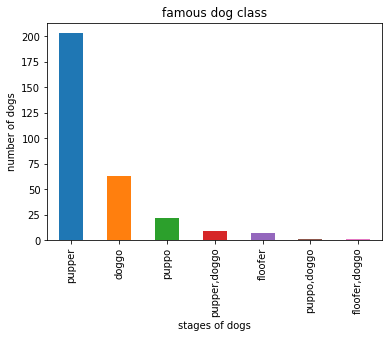

In [494]:
famous_dogclass.plot(kind='bar')
plt.title('famous dog class')
plt.xlabel('stages of dogs')
plt.ylabel('number of dogs')
plt.show()